# Preprocessing

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as gridspec
df = pd.read_csv('GermanCredit.csv')


In [250]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


### Preprocessing 2.1

In [251]:
dropped_columns = {}
for column in df.columns:
    if df[column].value_counts().index[0] == 'none':
        dropped_columns[column] = df[column].value_counts()

takeout = list(dropped_columns.items())[0:3] 
df.drop(dict(takeout), axis=1, inplace=True)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad


### Preprocessing 2.2

In [252]:
df.replace('\'','', regex=True, inplace=True)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


### Preprocessing 2.3

In [253]:
df['checking_status'] = df['checking_status'].replace('no checking','No Checking')
df['checking_status'] = df['checking_status'].replace('<0','Low')
df['checking_status'] = df['checking_status'].replace('0<=X<200','Medium')
df['checking_status'] = df['checking_status'].replace('>=200','High')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


### Preprocessing 2.4

In [254]:
df['savings_status'] = df['savings_status'].replace('no known savings','No Savings')
df['savings_status'] = df['savings_status'].replace('<100','Low')
df['savings_status'] = df['savings_status'].replace('100<=X<500','Medium')
df['savings_status'] = df['savings_status'].replace('500<=X<1000','High')
df['savings_status'] = df['savings_status'].replace('>=1000','High')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


### Preprocessing 2.5

In [255]:
df['class'] = df['class'].replace('good',1)
df['class'] = df['class'].replace('bad',0)
df['employment'] = df['employment'].replace('unemployed','Unemployed')
df['employment'] = df['employment'].replace('<1','Amateur')
df['employment'] = df['employment'].replace('1<=X<4','Professional')
df['employment'] = df['employment'].replace('4<=X<7','Experienced')
df['employment'] = df['employment'].replace('>=7','Expert')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


### Analysis 2.1

In [256]:
print(pd.crosstab(df['foreign_worker'], df['class'].replace([1, 0], ['good', 'bad'])))
print(pd.crosstab(df['employment'],df['savings_status']))

class           bad  good
foreign_worker           
no                4    33
yes             296   667
savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12


### Analysis 2.2

In [257]:
print(df[(df['personal_status'] == 'male single') & ((df['employment'] == 'Experienced'))]['credit_amount'].mean())

4142.592592592592


### Analysis 2.3

In [258]:
print(df['duration'].groupby(df['job']).mean())

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64


### Analysis 2.4

In [259]:
common_checking_status = df[df['purpose'] == 'education']['checking_status'].mode().tolist()
common_saving_status = df[df['purpose'] == 'education']['savings_status'].mode().tolist()
print('Most common checking status:',common_checking_status[0])
print('Most common checking saving:',common_saving_status[0])

Most common checking status: No Checking
Most common checking saving: Low


# Visualization

### Visualization 2.1

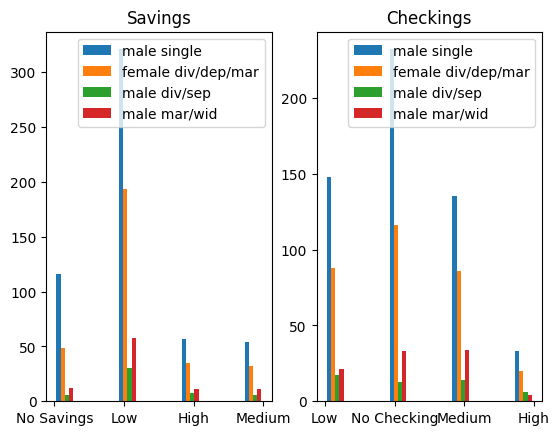

In [260]:
fig, axs = plt.subplots(1, 2)

axs[0].set(title='Savings')
axs[1].set(title='Checkings')

personal_status_labels = df['personal_status'].unique()
axs[0].hist([df.loc[df.personal_status == x, 'savings_status'] for x in personal_status_labels])
axs[0].legend(personal_status_labels)
axs[1].hist([df.loc[df.personal_status == x, 'checking_status'] for x in personal_status_labels])
axs[1].legend(personal_status_labels)


### Visualization 2.2

<BarContainer object of 4 artists>

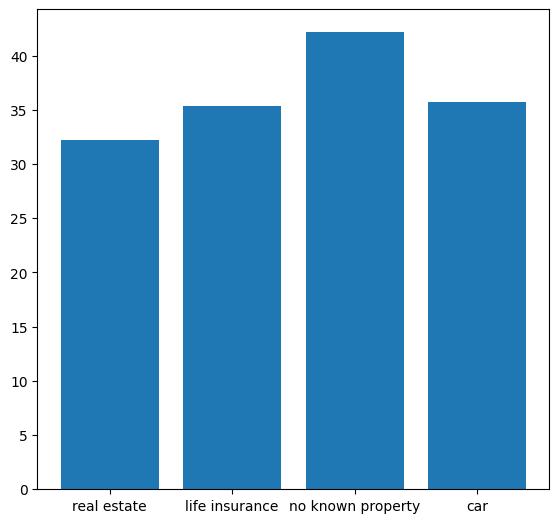

In [261]:
axes = plt.figure().add_axes([0.5,1,0.8,1])
modified_df = df[df['credit_amount'] > 4000]
axes.bar(modified_df.property_magnitude.unique(), modified_df['age'].groupby(df['property_magnitude']).mean())

### Visualization 2.3

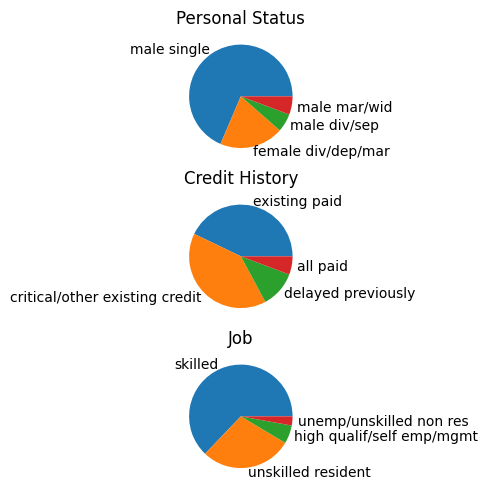

In [262]:
fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].set(title='Personal Status')
axs[1].set(title='Credit History')
axs[2].set(title='Job')

df2 = df[(df['savings_status'] == 'High') & (df['age'] > 40)]

lbl1 = ['male single', 'female div/dep/mar', 'male div/sep', 'male mar/wid']
lbl2 = ['existing paid','critical/other existing credit',
 'delayed previously', 'all paid' ]
lbl3 = ['skilled','unskilled resident', 'high qualif/self emp/mgmt','unemp/unskilled non res']

axs[0].pie(df2['personal_status'].value_counts(), labels=lbl1)
axs[1].pie(df2['credit_history'].value_counts(), labels=lbl2)
axs[2].pie(df2['job'].value_counts(), labels=lbl3)

plt.show()